## Two dimensional Lagrange interpolation

To extend to the two dimensional case, we start from two sets of distinct points, 
say $(n+1)$ points in the $x$ direction, and $m+1$ points in the $y$ direction, 
in the interval $[0,1]$.

A two dimensional version of the the Lagrange interpolation is then used to constuct
polynomial approximations of functions of two dimensions. A polynomial from 
$\Omega := [0,1]\times[0,1]$ to $R$ is defined as:

$$
\mathcal{P}^{n,m} : \text{span}\{p_i(x) p_j(y) \}_{i,j=0}^{n,m}
$$

and each *multi-index* $(i,j)$ represents a polynomial of order $i+j$, $i$ along
$x$, and $j$ along $y$. For convenience, we define

$$
p_{i,j}(x,y) :=  p_i(x)p_j(y) \qquad i = 0,\ldots,n \qquad j=0,\ldots,m
$$

Alternatively we can construct a basis starting from the Lagrange polynomials:


$$
l_{i,j}(x,y) := l_i(x) l_j(y)  \qquad i = 0,\ldots,n \qquad j=0,\ldots,m
$$

where we use the same symbol for the polynomials along the two directions for 
notational convenience, even though they are constructed from two different sets 
of points.

We define the *Lagrange interpolation* operator $\mathcal{L}^{n,m}$ the operator
$$
\mathcal{L}^{n,m} : C^0([0,1]\times[0,1]) \mapsto \mathcal{P}^{n,m}
$$
which satisfies
$$
(\mathcal{L}^{n,m} f)(q_{i,j}) = f(q_{i,j}), \qquad i=0,\dots,n, \qquad q_{i,j} := (x_i, y_j)
$$

In order to prevent indices bugs, we define two different refinement spaces, and two 
different orders, to make sure that no confusion is done along the $x$ and $y$ directions.

We try to be dimension independent, so we define everything starting from tuples of objects.
The dimension of the tuple defines if we are working in 1, 2, or 3 dimensions.

In [1]:
%matplotlib inline
from numpy import *
from pylab import *

dim = 2 
ref = (301, 311)
n   = (4,5)

assert dim == len(ref) == len(n), 'Check your dimensions!'

x = [linspace(0,1,r) for r in ref]
q = [linspace(0,1,r+1) for r in n]

We start by constructing the one dimensional basis, for each dimension. Once this is done, we 
compute the product $l_i(x)l_j(y)$, for each x and y in the two dimensional list x, 
containing the x and y points. This product can be reshaped to obtain a matrix of the right 
dimension, provided that we did the right thing in broadcasting the dimensions...

In [2]:
Ln = [zeros((n[i]+1, ref[i])) for i in xrange(dim)]

# Construct the lagrange basis in all directions
for d in xrange(dim):
    for i in xrange(n[d]+1):
        Ln[d][i] = product([ (x[d]-q[d][j])/(q[d][i]-q[d][j]) for j in xrange(n[d]+1) if j != i], axis=0)

# Now construct the product between each basis in 
# each coordinate direction, to use for plotting and interpolation
if dim == 2:
    L = einsum('ij,kl -> ikjl', Ln[1], Ln[0])
elif dim == 3:
    L = einsum('ij,kl,mn -> ikmjln', Ln[2], Ln[1], Ln[0])
elif dim == 1:
    L = Ln[0]
else:
    raise

print(L.shape)
Lf = reshape(L, (prod(L.shape[:dim]), prod(L.shape[dim:])))
print(Lf.shape)

(6, 5, 311, 301)
(30, 93611)


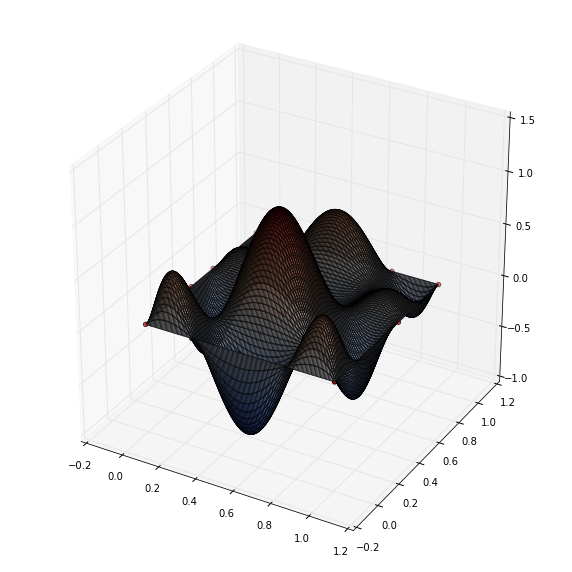

In [3]:
from mpl_toolkits.mplot3d import Axes3D

X = meshgrid(x[0], x[1])
Q = meshgrid(q[0], q[1])

fig = figure(figsize=[10,10])
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X[0], X[1], L[2,2], rstride=2, cstride=2, cmap=cm.coolwarm, alpha=0.7)
scatter = ax.scatter(Q[0], Q[1], zeros_like(Q[0]), c='r', marker='o')

Now we try to make an interpolation. First we need to evaluate the function at the interpolation
points. This is done by expressing all possible combinations of the points by meshgrid on q:

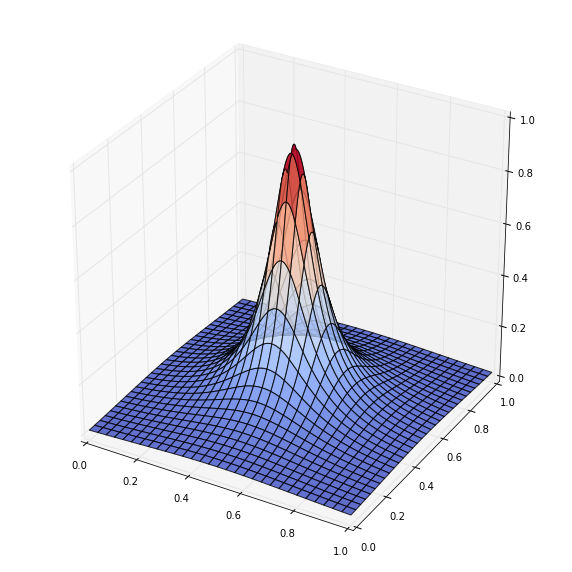

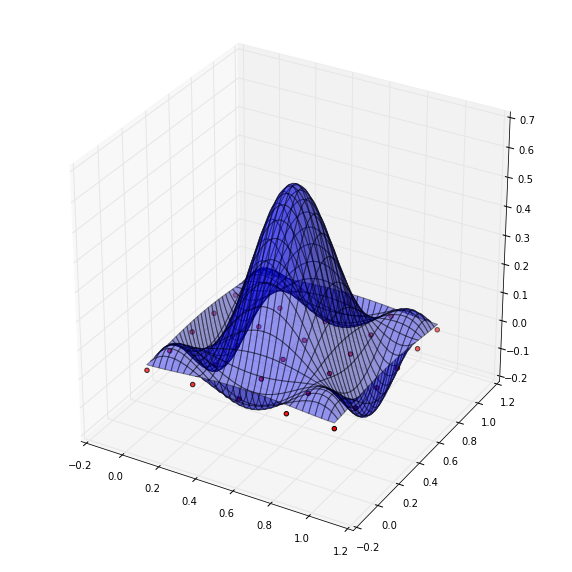

In [4]:
Q = meshgrid(q[0], q[1])

def f(x,y):
    return 1/(1+100*((x-.5)**2+(y-.5)**2))

F = f(Q[0], Q[1])

def my_plot(f): 
    fig = figure(figsize=[10,10])
    ax = fig.gca(projection='3d')
    surf2 = ax.plot_surface(X[0], X[1], f(X[0], X[1]), cmap=cm.coolwarm, alpha=0.8)

    show()
    
    fig = figure(figsize=[10,10])
    ax = fig.gca(projection='3d')
    scatter = ax.scatter(Q[0], Q[1], zeros_like(Q[0]), c='r', marker='o')
    interp = Lf.T.dot(F.reshape((-1,))).reshape(X[0].shape)
    surf3 = ax.plot_surface(X[0], X[1], interp, alpha=0.4)
    show()

my_plot(f)